In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Original Data:
[[160  55]
 [170  65]
 [180  75]
 [150  50]
 [165  60]
 [175  70]
 [185  80]
 [155  52]
 [168  62]
 [178  72]]

Standardized Data:
[[-0.8025126  -0.94930827]
 [ 0.13064159  0.09388763]
 [ 1.06379577  1.13708354]
 [-1.73566678 -1.47090623]
 [-0.33593551 -0.42771032]
 [ 0.59721868  0.61548558]
 [ 1.53037286  1.65868149]
 [-1.26908969 -1.26226705]
 [-0.05598925 -0.21907114]
 [ 0.87716493  0.82412477]]


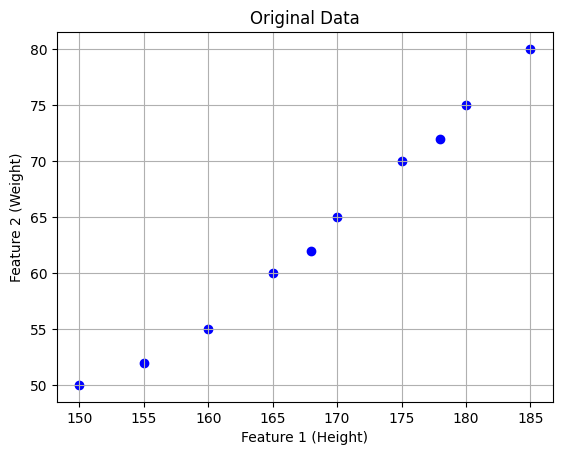

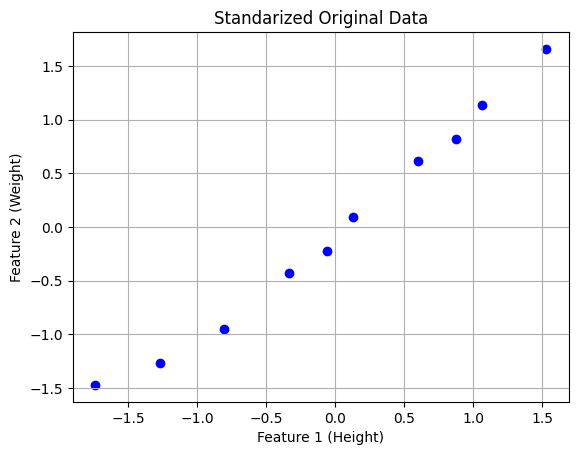

In [ ]:
# Sample dataset (height, weight of 10 people)
X = np.array([[160, 55], [170, 65], [180, 75], [150, 50], [165, 60],
              [175, 70], [185, 80], [155, 52], [168, 62], [178, 72]])

# Standardize the data (PCA works better when data is scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original Data:")
print(X)

print("\nStandardized Data:")
print(X_scaled)

plt.scatter(X[:, 0], X[:, 1], color='blue')
plt.xlabel("Feature 1 (Height)")
plt.ylabel("Feature 2 (Weight)")
plt.title("Original Data")
plt.grid()
plt.show()
print("\n")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue')
plt.xlabel("Feature 1 (Height)")
plt.ylabel("Feature 2 (Weight)")
plt.title("Standarized Original Data")
plt.grid()
plt.show()




In [ ]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Keep both principal components
pca.fit(X_scaled)

# Get eigenvectors and eigenvalues
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

print("Eigenvectors (Principal Components):")
print(eigenvectors)

print("\nEigenvalues (Variance explained by each component):")
print(eigenvalues)


Eigenvectors (Principal Components):
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues (Variance explained by each component):
[2.21371978 0.00850244]


In [ ]:
X_pca = pca.transform(X_scaled)

print("\nTransformed Data (PCA components):")
print(X_pca)



Transformed Data (PCA components):
[[-1.23872442  0.10380022]
 [ 0.15876613  0.02598897]
 [ 1.55625668 -0.05182228]
 [-2.26738952 -0.18721398]
 [-0.53997914  0.06489459]
 [ 0.85751141 -0.01291665]
 [ 2.25500196 -0.0907279 ]
 [-1.78993952 -0.00482434]
 [-0.19449707  0.11531631]
 [ 1.20299348  0.03750506]]


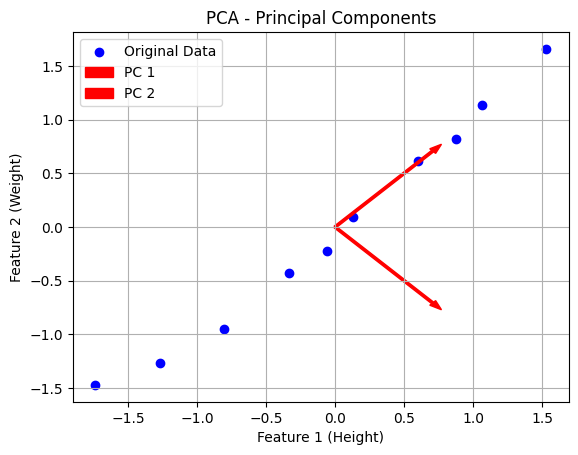

In [ ]:
# Plot original data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue', label="Original Data")

# Plot eigenvectors (principal components)
origin = np.mean(X_scaled, axis=0)  # Origin for arrows (mean of data)
for i in range(2):
    plt.arrow(origin[0], origin[1], eigenvectors[i, 0], eigenvectors[i, 1],
              color='red', width=0.02, label=f'PC {i+1}')

plt.xlabel("Feature 1 (Height)")
plt.ylabel("Feature 2 (Weight)")
plt.title("PCA - Principal Components")
plt.legend()
plt.grid()
plt.show()


[[-0.8025126  -0.94930827]
 [ 0.13064159  0.09388763]
 [ 1.06379577  1.13708354]
 [-1.73566678 -1.47090623]
 [-0.33593551 -0.42771032]
 [ 0.59721868  0.61548558]
 [ 1.53037286  1.65868149]
 [-1.26908969 -1.26226705]
 [-0.05598925 -0.21907114]
 [ 0.87716493  0.82412477]]


[[-1.23872442]
 [ 0.15876613]
 [ 1.55625668]
 [-2.26738952]
 [-0.53997914]
 [ 0.85751141]
 [ 2.25500196]
 [-1.78993952]
 [-0.19449707]
 [ 1.20299348]]


[[-0.87591044 -0.87591044]
 [ 0.11226461  0.11226461]
 [ 1.10043965  1.10043965]
 [-1.60328651 -1.60328651]
 [-0.38182291 -0.38182291]
 [ 0.60635213  0.60635213]
 [ 1.59452718  1.59452718]
 [-1.26567837 -1.26567837]
 [-0.1375302  -0.1375302 ]
 [ 0.85064485  0.85064485]]


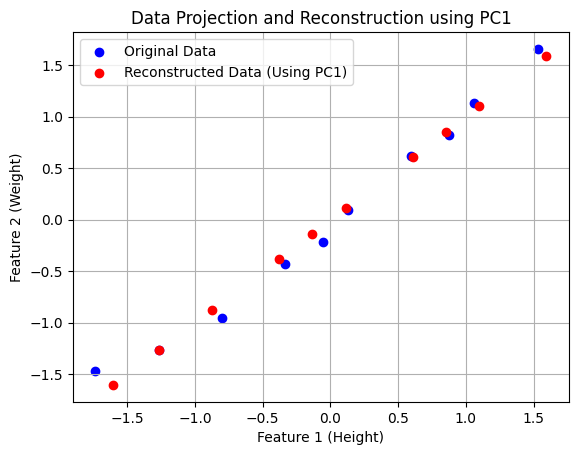

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Original data (height, weight)
X = np.array([[160, 55], [170, 65], [180, 75], [150, 50], [165, 60],
              [175, 70], [185, 80], [155, 52], [168, 62], [178, 72]])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=1)  # Keep only PC1
X_pca = pca.fit_transform(X_scaled)  # Project data onto PC1

# Reconstruct data from PC1
X_reconstructed = pca.inverse_transform(X_pca)

print(X_scaled)
print("\n")
print(X_pca)
print("\n")
print(X_reconstructed)

# Plot original vs reconstructed data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='blue', label="Original Data")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='red', label="Reconstructed Data (Using PC1)")
plt.xlabel("Feature 1 (Height)")
plt.ylabel("Feature 2 (Weight)")
plt.title("Data Projection and Reconstruction using PC1")
plt.legend()
plt.grid()
plt.show()
